<a href="https://colab.research.google.com/github/piyushbnsal10/Udacity-Pytorch-Scholarship/blob/master/Pytorch_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/udacity/pytorch_challenge.git

Cloning into 'pytorch_challenge'...
remote: Enumerating objects: 10, done.
remote: Total 10 (delta 0), reused 0 (delta 0), pack-reused 10
Unpacking objects: 100% (10/10), done.


In [2]:
cd pytorch_challenge

/content/pytorch_challenge


In [3]:
ls

 assets/   cat_to_name.json  'Image Classifier Project.ipynb'


In [0]:
!wget -cq https://s3.amazonaws.com/content.udacity-data.com/courses/nd188/flower_data.zip

In [0]:
!unzip -o -qq flower_data.zip

In [6]:
ls

 assets/            flower_data/     'Image Classifier Project.ipynb'
 cat_to_name.json   flower_data.zip


In [7]:
import json

with open('cat_to_name.json') as f:
    data=json.load(f)

data=dict(data)

#print(data['21'])

import torch
import matplotlib.pyplot as plt
%matplotlib inline
from torchvision import datasets
import torchvision.transforms as transforms
import numpy as np



transform=transforms.Compose([transforms.Resize(256),transforms.CenterCrop(224),transforms.ToTensor(),transforms.Normalize((0.485,0.456,0.406),(0.229,0.224,0.225))])
train_dataset=datasets.ImageFolder("flower_data/train/",transform=transform)
test_dataset=datasets.ImageFolder("flower_data/valid/",transform=transform)

print(train_dataset.classes)
train_data=torch.utils.data.DataLoader(train_dataset,batch_size=64,shuffle=True)
test_data=torch.utils.data.DataLoader(test_dataset,batch_size=64,shuffle=False)

['1', '10', '100', '101', '102', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99']


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

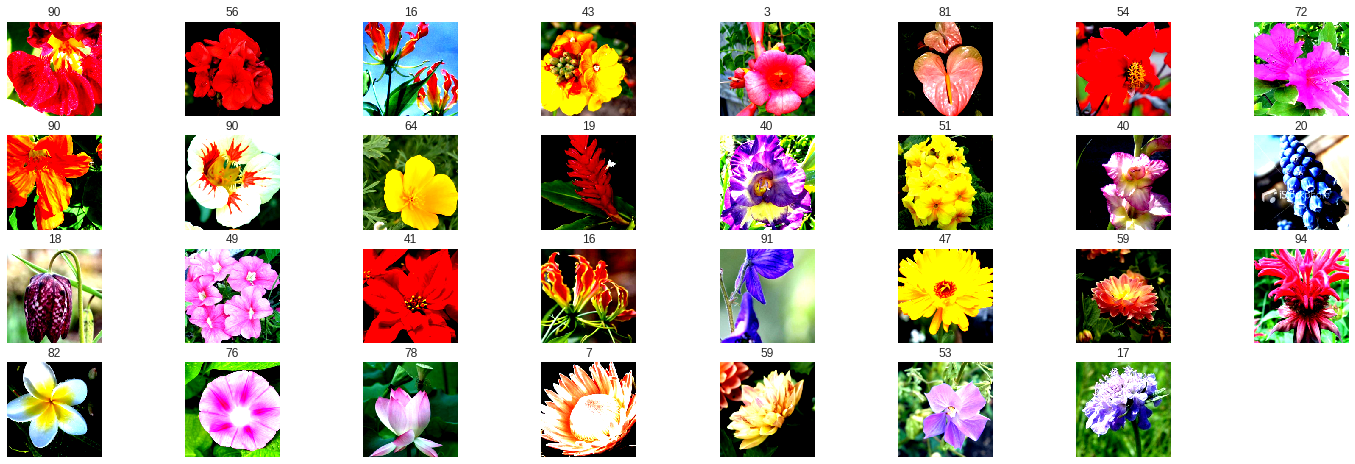

In [0]:


fig = plt.figure(figsize=(25, 8))
image,label =next(iter(train_data))
image=image/2+0.5
for i in range(31):
  ax = fig.add_subplot(4, 8, i+1, xticks=[], yticks=[])
  plt.imshow(np.transpose(image[i],(1,2,0)))
  ax.set_title(str(label[i].numpy()))
  

In [0]:
import torch 
from torch import nn
from torch import optim
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision import datasets, transforms, models
from torch.optim import lr_scheduler


In [10]:
# Use GPU if it's available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = models.densenet121(pretrained=True)

# Freeze parameters so we don't backprop through them
for param in model.parameters():
    param.requires_grad = True
    
model.classifier = nn.Sequential(nn.Linear(1024, 512),
                                 nn.ReLU(),
                                 nn.Dropout(0.2),
                                 nn.Linear(512, 102))
                                 

criterion = nn.CrossEntropyLoss()

# Only train the classifier parameters, feature parameters are frozen
optimizer = optim.Adam(model.classifier.parameters(), lr=0.001,amsgrad=False)

model.to(device);
model

DenseNet(
  (features): Sequential(
    (conv0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (norm0): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu0): ReLU(inplace)
    (pool0): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (denseblock1): _DenseBlock(
      (denselayer1): _DenseLayer(
        (norm1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplace)
        (conv1): Conv2d(64, 128, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (norm2): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu2): ReLU(inplace)
        (conv2): Conv2d(128, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      )
      (denselayer2): _DenseLayer(
        (norm1): BatchNorm2d(96, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu1): ReLU(inplac

In [11]:
epochs = 30
steps = 0
running_loss = 0
print_every = 5
test_loss_min=np.Inf
for epoch in range(epochs):
    for inputs, labels in train_data:
        steps += 1
        # Move input and label tensors to the default device
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        
        logps = model.forward(inputs)
        loss = criterion(logps, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        
        if steps % print_every == 0:
            test_loss = 0
            accuracy = 0
            model.eval()
            with torch.no_grad():
                for inputs, labels in test_data:
                    inputs, labels = inputs.to(device), labels.to(device)
                    logps = model.forward(inputs)
                    batch_loss = criterion(logps, labels)
                    
                    test_loss += batch_loss.item()
                    
                    # Calculate accuracy
                    ps = torch.exp(logps)
                    top_p, top_class = ps.topk(1, dim=1)
                    equals = top_class == labels.view(*top_class.shape)
                    accuracy += torch.mean(equals.type(torch.FloatTensor)).item()
                    
                    if test_loss/len(test_data) <= test_loss_min:
                      print('Test loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
                            test_loss_min,
                            test_loss/len(test_data)))
                      torch.save(model.state_dict(), 'Pytorch_model.pt')
                      test_loss_min = test_loss/len(test_data)
                    
            print(f"Epoch {epoch+1}/{epochs}.. "
                  f"Train loss: {running_loss/print_every:.3f}.. "
                  f"Test loss: {test_loss/len(test_data):.3f}.. "
                  f"Test accuracy: {accuracy/len(test_data):.3f}")
            running_loss = 0
            model.train()

Test loss decreased (inf --> 0.395065).  Saving model ...
Epoch 1/30.. Train loss: 4.536.. Test loss: 4.470.. Test accuracy: 0.067
Test loss decreased (0.395065 --> 0.371037).  Saving model ...
Epoch 1/30.. Train loss: 4.495.. Test loss: 4.226.. Test accuracy: 0.136
Test loss decreased (0.371037 --> 0.356071).  Saving model ...
Epoch 1/30.. Train loss: 4.255.. Test loss: 4.033.. Test accuracy: 0.205
Test loss decreased (0.356071 --> 0.348929).  Saving model ...
Epoch 1/30.. Train loss: 3.971.. Test loss: 3.817.. Test accuracy: 0.196
Test loss decreased (0.348929 --> 0.344765).  Saving model ...
Epoch 1/30.. Train loss: 3.636.. Test loss: 3.573.. Test accuracy: 0.309
Test loss decreased (0.344765 --> 0.328831).  Saving model ...
Epoch 1/30.. Train loss: 3.497.. Test loss: 3.311.. Test accuracy: 0.361
Test loss decreased (0.328831 --> 0.298432).  Saving model ...
Epoch 1/30.. Train loss: 3.325.. Test loss: 3.066.. Test accuracy: 0.373
Test loss decreased (0.298432 --> 0.277717).  Saving 

KeyboardInterrupt: ignored

In [0]:
from google.colab import files
files.download( "Pytorch_model.pt" ) 